# Scaling Exercises
Do your work for these exercises in a jupyter notebook named ```scaling```. Use the zillow dataset you ```acquired``` and ```prepped``` in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

import seaborn as sns
import matplotlib.pyplot as plt
# Only works inside notebook
%matplotlib inline 

import QMCBT_wrangle as w
import QMCBT_explore_evaluate as ee
from env import user, password, host

import warnings
warnings.filterwarnings("ignore")

In [2]:
# use custom wrangle function to automate Acquire and Prepare
df = w.wrangle_zillow()

In [3]:
df.head().T

,0,1,2,3,4
bedrooms,4,3,3,3,3
bathrooms,2.0,4.0,2.0,1.0,2.0
bath_to_bed_ratio,2.0,0.75,1.5,3.0,1.5
sqft,3633,1620,2077,1244,1300
yearbuilt,2005,2011,1926,1950,1950
age,12,6,91,67,67
tax_appraisal,296425,847770,646760,169471,233266
tax_bill,6941.39,10244.94,7924.68,2532.88,3110.99
tax_percentage,0.0234,0.0121,0.0123,0.0149,0.0133
fips,6037,6037,6037,6037,6037


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013756 entries, 0 to 2013755
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   bedrooms           Int64  
 1   bathrooms          Float64
 2   bath_to_bed_ratio  Float64
 3   sqft               Int64  
 4   yearbuilt          Int64  
 5   age                Int64  
 6   tax_appraisal      Int64  
 7   tax_bill           Float64
 8   tax_percentage     Float64
 9   fips               Int64  
 10  county             object 
 11  state              object 
dtypes: Float64(4), Int64(6), object(2)
memory usage: 218.9+ MB


In [5]:
df.isnull().sum()

bedrooms             0
bathrooms            0
bath_to_bed_ratio    0
sqft                 0
yearbuilt            0
age                  0
tax_appraisal        0
tax_bill             0
tax_percentage       0
fips                 0
county               0
state                0
dtype: int64

In [6]:
train, validate, test = w.split(df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (2013756, 12)

      Train: (1208253, 12) - 60.0%
   Validate: (402751, 12) - 20.0%
       Test: (402752, 12) - 20.0%


In [7]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,1208243,1208244,1208245,1208246,1208247,1208248,1208249,1208250,1208251,1208252
bedrooms,4,2,3,3,3,4,4,3,6,4,...,4,4,4,3,3,3,4,4,4,4
bathrooms,2.0,1.5,3.5,2.0,1.0,2.0,2.0,2.0,3.0,3.0,...,3.0,2.0,2.0,2.5,1.5,2.0,3.0,5.5,2.5,3.0
bath_to_bed_ratio,2.0,1.3333,0.8571,1.5,3.0,2.0,2.0,1.5,2.0,1.3333,...,1.3333,2.0,2.0,1.2,2.0,1.5,1.3333,0.7273,1.6,1.3333
sqft,1404,960,4219,1765,1348,1582,1233,1255,3034,2265,...,2359,1269,1071,2679,1050,2162,1924,5992,1485,2610
yearbuilt,1956,1963,1985,1954,1942,1977,1953,1961,1929,1924,...,1980,1954,1954,1988,1963,1911,1971,1968,2015,2010
age,61,54,32,63,75,40,64,56,88,93,...,37,63,63,29,54,106,46,49,2,7
tax_appraisal,288931,356000,1937246,225118,583024,335280,65393,487622,1507103,299363,...,378448,304213,160547,363732,253542,283187,436158,1446907,303738,596966
tax_bill,3518.2,4173.04,19552.96,2948.83,7017.33,4213.39,1241.64,5640.2,17337.68,4900.98,...,4600.74,3859.08,3060.48,4168.56,3054.08,3540.51,5329.17,15986.4,3411.08,7403.02
tax_percentage,0.0122,0.0117,0.0101,0.0131,0.012,0.0126,0.019,0.0116,0.0115,0.0164,...,0.0122,0.0127,0.0191,0.0115,0.012,0.0125,0.0122,0.011,0.0112,0.0124
fips,6037,6059,6059,6037,6037,6037,6037,6059,6037,6037,...,6037,6059,6037,6111,6059,6037,6037,6059,6111,6037


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

<AxesSubplot:xlabel='fips'>

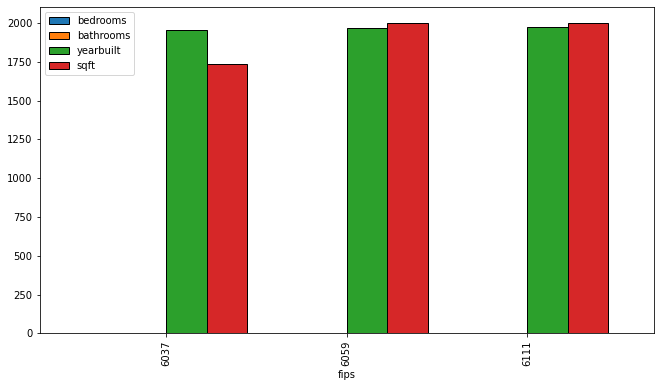

In [8]:
# Unscaled Distribution
train[['bedrooms', 'bathrooms', 'yearbuilt', 'sqft', 'fips']].groupby('fips').mean().plot.bar(figsize=(11, 6), ec='black', width=.9)

In [9]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,1208243,1208244,1208245,1208246,1208247,1208248,1208249,1208250,1208251,1208252
bedrooms,4,2,3,3,3,4,4,3,6,4,...,4,4,4,3,3,3,4,4,4,4
bathrooms,2.0,1.5,3.5,2.0,1.0,2.0,2.0,2.0,3.0,3.0,...,3.0,2.0,2.0,2.5,1.5,2.0,3.0,5.5,2.5,3.0
bath_to_bed_ratio,2.0,1.3333,0.8571,1.5,3.0,2.0,2.0,1.5,2.0,1.3333,...,1.3333,2.0,2.0,1.2,2.0,1.5,1.3333,0.7273,1.6,1.3333
sqft,1404,960,4219,1765,1348,1582,1233,1255,3034,2265,...,2359,1269,1071,2679,1050,2162,1924,5992,1485,2610
yearbuilt,1956,1963,1985,1954,1942,1977,1953,1961,1929,1924,...,1980,1954,1954,1988,1963,1911,1971,1968,2015,2010
age,61,54,32,63,75,40,64,56,88,93,...,37,63,63,29,54,106,46,49,2,7
tax_appraisal,288931,356000,1937246,225118,583024,335280,65393,487622,1507103,299363,...,378448,304213,160547,363732,253542,283187,436158,1446907,303738,596966
tax_bill,3518.2,4173.04,19552.96,2948.83,7017.33,4213.39,1241.64,5640.2,17337.68,4900.98,...,4600.74,3859.08,3060.48,4168.56,3054.08,3540.51,5329.17,15986.4,3411.08,7403.02
tax_percentage,0.0122,0.0117,0.0101,0.0131,0.012,0.0126,0.019,0.0116,0.0115,0.0164,...,0.0122,0.0127,0.0191,0.0115,0.012,0.0125,0.0122,0.011,0.0112,0.0124
fips,6037,6059,6059,6037,6037,6037,6037,6059,6037,6037,...,6037,6059,6037,6111,6059,6037,6037,6059,6111,6037


<div class="alert alert-info">

#### Observations:
* You can't even see bedroom and bathroom because their scale is so small in comparison to sqft
    
</div>

<AxesSubplot:xlabel='fips'>

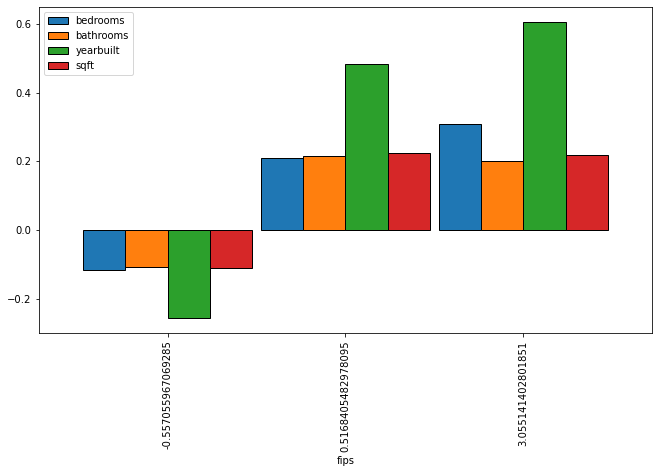

In [10]:
# Scaled Distribution
std_scaler_df = train.copy()

cols = ['bedrooms', 'bathrooms', 'yearbuilt', 'sqft', 'fips']
scaler = StandardScaler()
std_scaler_df[cols] = scaler.fit_transform(std_scaler_df[cols])
std_scaler_df[cols].groupby('fips').mean().plot.bar(figsize=(11, 6), ec='black', width=.95)

In [11]:
std_scaler_df.T

,0,1,2,3,4,5,6,7,8,9,...,1208243,1208244,1208245,1208246,1208247,1208248,1208249,1208250,1208251,1208252
bedrooms,0.779198,-1.463883,-0.342343,-0.342343,-0.342343,0.779198,0.779198,-0.342343,3.022278,0.779198,...,0.779198,0.779198,0.779198,-0.342343,-0.342343,-0.342343,0.779198,0.779198,0.779198,0.779198
bathrooms,-0.247606,-0.810537,1.441186,-0.247606,-1.373468,-0.247606,-0.247606,-0.247606,0.878256,0.878256,...,0.878256,-0.247606,-0.247606,0.315325,-0.810537,-0.247606,0.878256,3.69291,0.315325,0.878256
bath_to_bed_ratio,2.0,1.3333,0.8571,1.5,3.0,2.0,2.0,1.5,2.0,1.3333,...,1.3333,2.0,2.0,1.2,2.0,1.5,1.3333,0.7273,1.6,1.3333
sqft,-0.524206,-1.078,2.986895,-0.073937,-0.594054,-0.30219,-0.737492,-0.710052,1.508865,0.549704,...,0.666949,-0.69259,-0.939552,1.066079,-0.965745,0.421234,0.124381,5.198327,-0.423176,0.980017
yearbuilt,-0.235962,0.086577,1.100271,-0.328116,-0.88104,0.731655,-0.374193,-0.005577,-1.480041,-1.710426,...,0.869886,-0.328116,-0.328116,1.238502,0.086577,-2.309427,0.455193,0.316962,2.482581,2.252196
age,61,54,32,63,75,40,64,56,88,93,...,37,63,63,29,54,106,46,49,2,7
tax_appraisal,288931,356000,1937246,225118,583024,335280,65393,487622,1507103,299363,...,378448,304213,160547,363732,253542,283187,436158,1446907,303738,596966
tax_bill,3518.2,4173.04,19552.96,2948.83,7017.33,4213.39,1241.64,5640.2,17337.68,4900.98,...,4600.74,3859.08,3060.48,4168.56,3054.08,3540.51,5329.17,15986.4,3411.08,7403.02
tax_percentage,0.0122,0.0117,0.0101,0.0131,0.012,0.0126,0.019,0.0116,0.0115,0.0164,...,0.0122,0.0127,0.0191,0.0115,0.012,0.0125,0.0122,0.011,0.0112,0.0124
fips,-0.557056,0.516841,0.516841,-0.557056,-0.557056,-0.557056,-0.557056,0.516841,-0.557056,-0.557056,...,-0.557056,0.516841,-0.557056,3.055141,0.516841,-0.557056,-0.557056,0.516841,3.055141,-0.557056


Text(0, 0.5, 'Count')

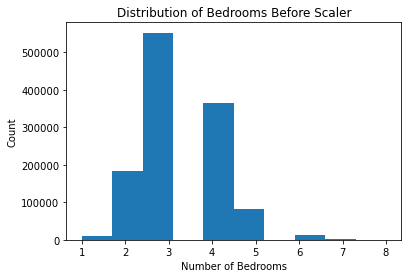

In [12]:
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before Scaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

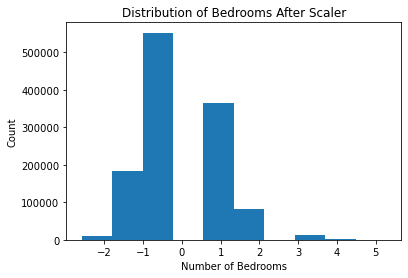

In [13]:
plt.hist(std_scaler_df.bedrooms)
plt.title('Distribution of Bedrooms After Scaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

<div class="alert alert-info">

#### Observations:
* You can definately see the bedroom and bathroom percentages now
* The variances in yearbuilt and sqft are much more visible now 
* The FIPS on the left is more than likely associated with a historical district based on the older year built and lower ratio of bed and bath in relation to the other two FIPS
    
</div>

In [14]:
# Function Stolen from Codeup Instructor Andrew King
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    """
    This Function takes input arguments, 
    creates a copy of the df argument, 
    scales it according to the scaler argument, 
    then displays subplots of the columns_to_scale argument 
    before and after scaling and then returns the copy df as df_scaled
    """    
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
    #return df_scaled.head().T
    #return fig, axs

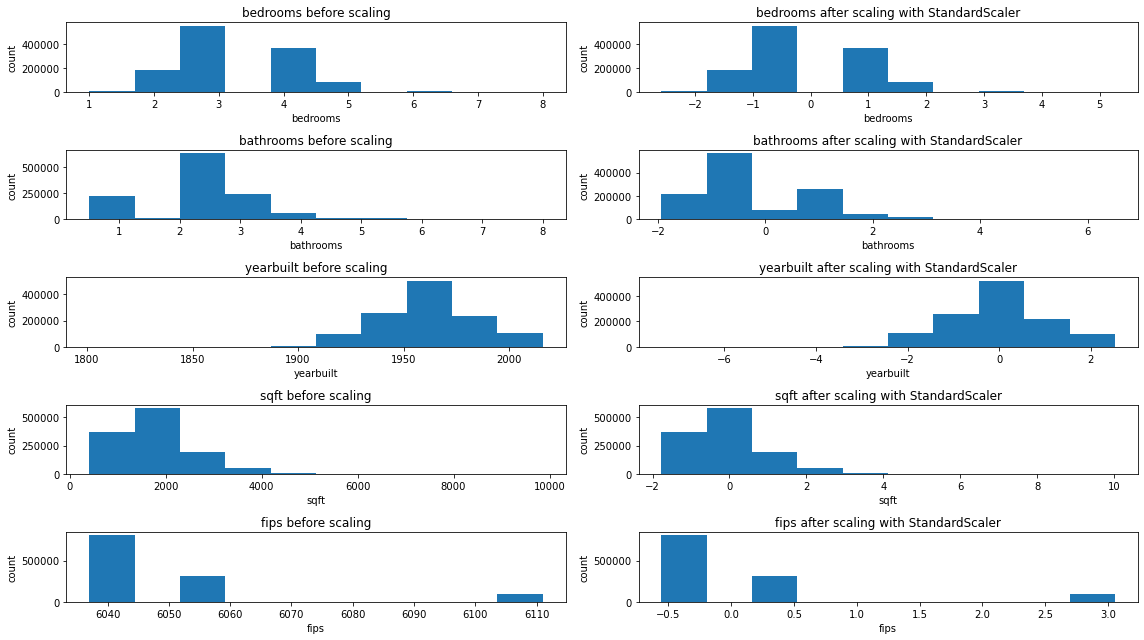

In [15]:
# StandardScaler
scaler = StandardScaler()
columns_to_scale = ['bedrooms', 'bathrooms', 'yearbuilt', 'sqft', 'fips']

visualize_scaler(scaler, train, columns_to_scale, bins=10)

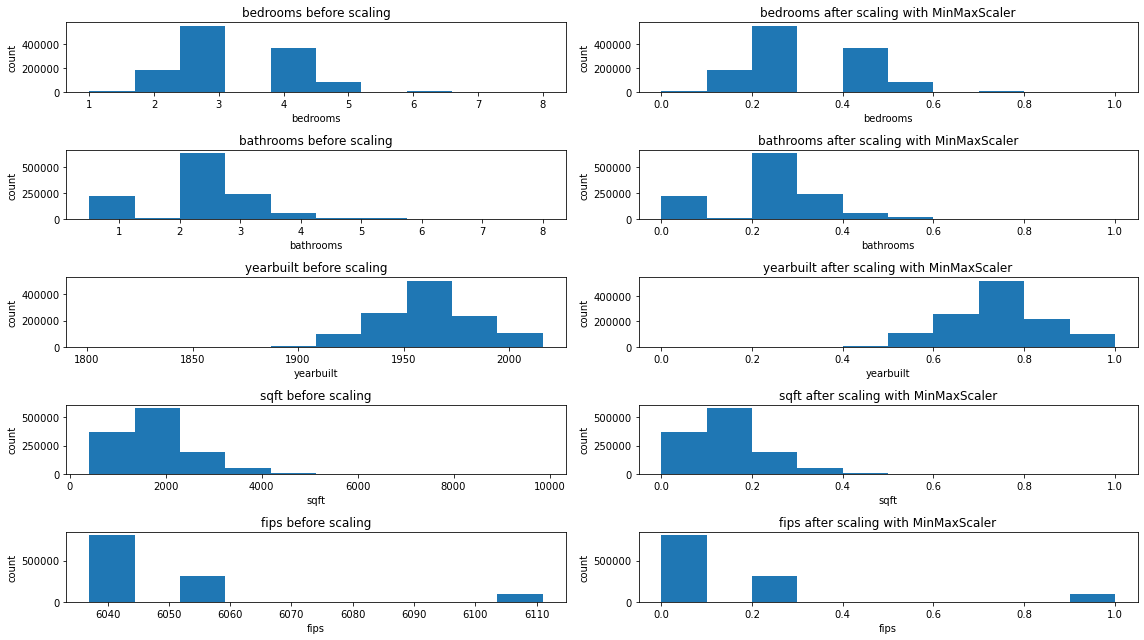

In [16]:
# MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['bedrooms', 'bathrooms', 'yearbuilt', 'sqft', 'fips']

visualize_scaler(scaler, train, columns_to_scale, bins=10)

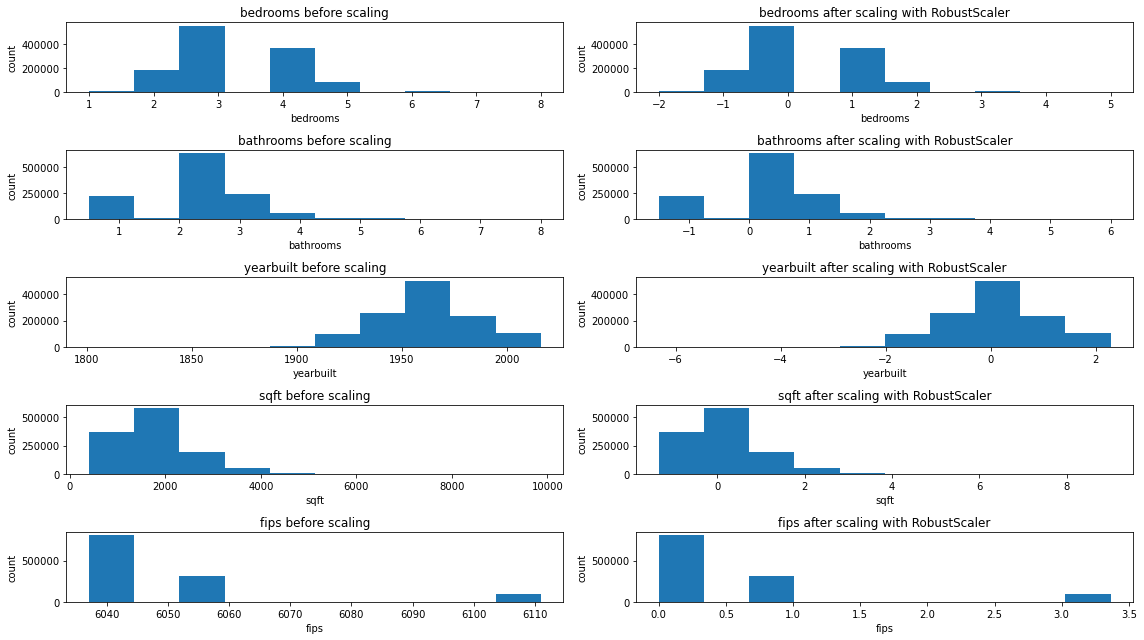

In [17]:
# RobustScaler
scaler = RobustScaler()
columns_to_scale = ['bedrooms', 'bathrooms', 'yearbuilt', 'sqft', 'fips']

visualize_scaler(scaler, train, columns_to_scale, bins=10)

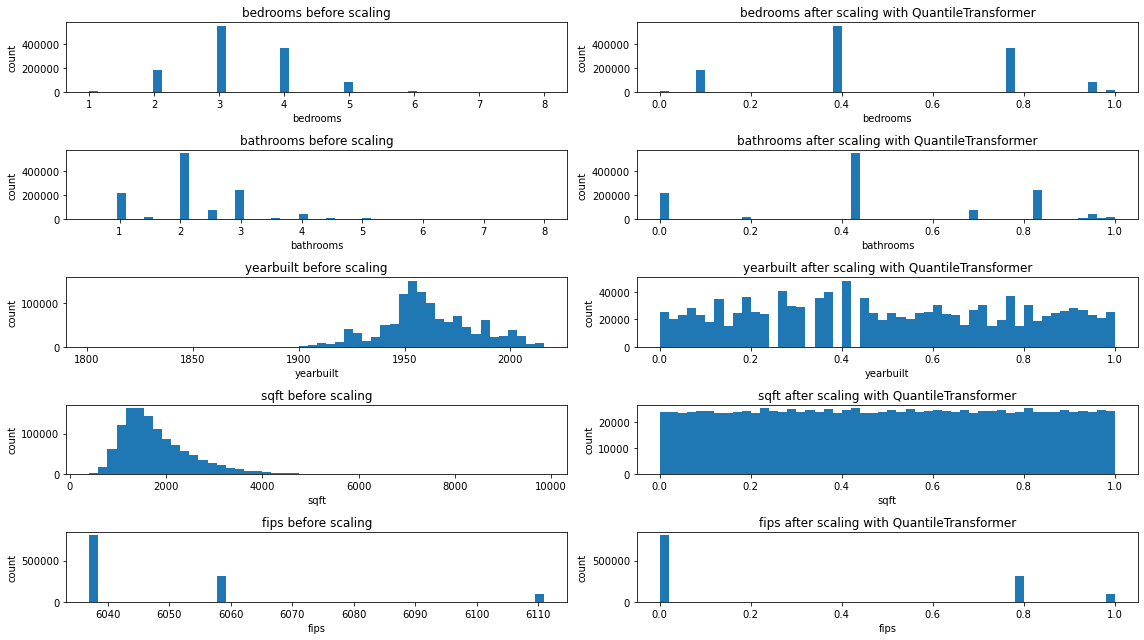

In [18]:
# QuantileTransformer
scaler = QuantileTransformer()
columns_to_scale = ['bedrooms', 'bathrooms', 'yearbuilt', 'sqft', 'fips']

visualize_scaler(scaler, train, columns_to_scale, bins=50)

<div class="alert alert-info">

#### Observations:
* Because the data is continuous, three of the scalers (MinMaxScaler, StandardScaler, RobustScaler) graph the same as the original with the exception of course... that they run on a shorter variance of scale along the x axis.
* The fourth scaler (QuantileTransformer) does not graph well because it attempts to evenly distribute the data.
    
</div>    

### 2. Apply the ```.inverse_transform``` method to your scaled data. Is the resulting dataset the exact same as the original data?

<div class="alert alert-success">

#### ANSWER:
* Yes, the ```.inverse_transform``` reverts the scaled data back to its original values
    
</div>

In [19]:
scaler = MinMaxScaler()
original_data = train[['tax_appraisal']]
scaled_data = scaler.fit_transform(original_data)

In [20]:
scaled_data[:5]

array([[0.12252872],
       [0.15692308],
       [0.96781846],
       [0.0898041 ],
       [0.27334564]])

In [21]:
original_data.head()

,tax_appraisal
0,288931
1,356000
2,1937246
3,225118
4,583024


In [22]:
scaler.inverse_transform(scaled_data)[:5]

array([[ 288931.],
       [ 356000.],
       [1937246.],
       [ 225118.],
       [ 583024.]])

### 3. Read the documentation for sklearn's ```QuantileTransformer```. Use ```normal``` for the ```output_distribution``` and apply this scaler to your data. Visualize the result of your data scaling.

In [23]:
QuantileTransformer?

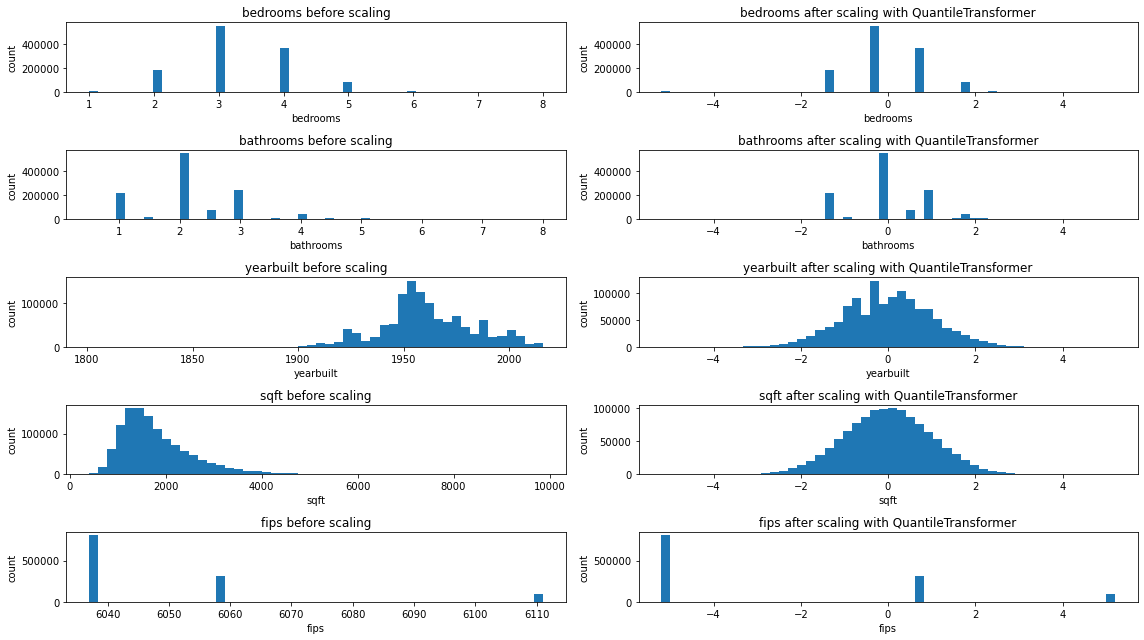

In [24]:
# QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
columns_to_scale = ['bedrooms', 'bathrooms', 'yearbuilt', 'sqft', 'fips']

visualize_scaler(scaler, train, columns_to_scale, bins=50)

<div class="alert alert-info">

#### Observations:

* Using a normal distribution keeps the scaler from trying to evenly distribute the data as much and you can see a bell curve instead of a filled block. 
    
</div>

### 4. Use the ```QuantileTransformer```, but omit the output_distribution argument. Visualize your results. What do you notice?

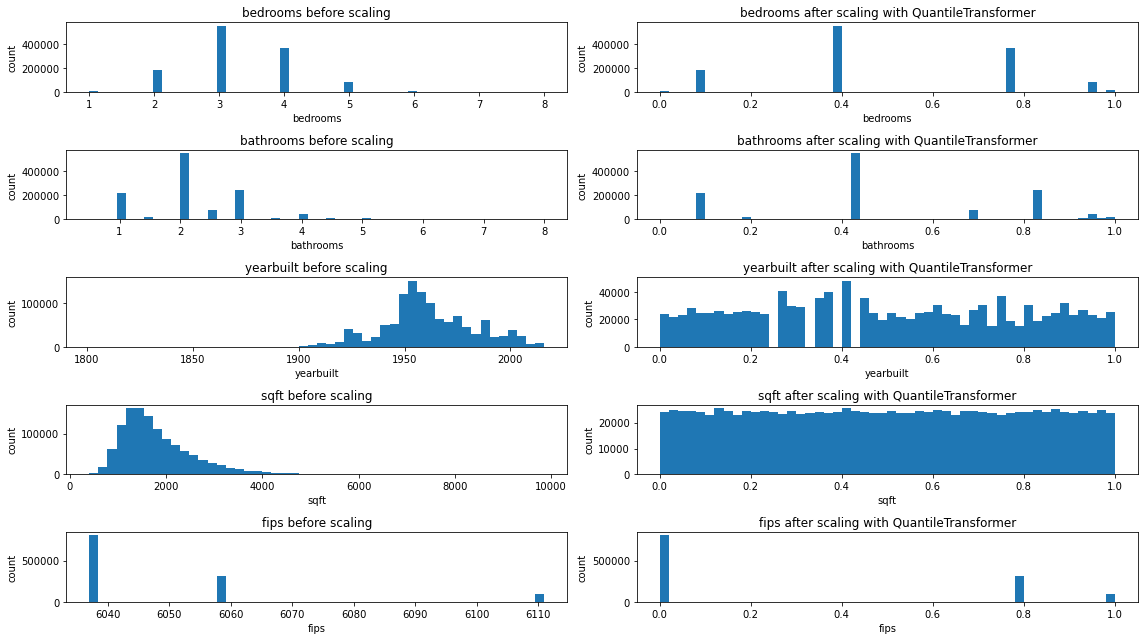

In [25]:
# QuantileTransformer
scaler = QuantileTransformer()
columns_to_scale = ['bedrooms', 'bathrooms', 'yearbuilt', 'sqft', 'fips']
visualize_scaler(scaler, train, columns_to_scale, bins=50)

<div class="alert alert-info">

#### Observations:

* QuantileTransformer does not graph well eithout normal distribution because it attempts to evenly distribute the data.
    
</div>

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your ```prepare.py``` that accepts as input the ```train```, ```validate```, and ```test``` data splits, and returns the ```scaled``` versions of each. Be sure to only learn the parameters for scaling from your training data!

In [26]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale,
               scaler,
               return_scaler = False):
    
    """
    Scales the 3 data splits. 
    Takes in train, validate, and test data 
    splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    
    Imports Needed:
    from sklearn.preprocessing import MinMaxScaler 
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import RobustScaler
    from sklearn.preprocessing import QuantileTransformer
    
    Arguments Taken:
               train = Assign the train DataFrame
            validate = Assign the validate DataFrame 
                test = Assign the test DataFrame
    columns_to_scale = Assign the Columns that you want to scale
              scaler = Assign the scaler to use MinMaxScaler(),
                                                StandardScaler(), 
                                                RobustScaler(), or 
                                                QuantileTransformer()
       return_scaler = False by default and will not return scaler data
                       True will return the scaler data before displaying the _scaled data
    """
    
    # make copies of our original data so we dont corrupt original split
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    # fit the scaled data
    scaler.fit(train[columns_to_scale])
    
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    
    else:
        return train_scaled, validate_scaled, test_scaled

In [29]:
scaler = QuantileTransformer()
columns_to_scale = ['bedrooms', 'bathrooms', 'yearbuilt', 'sqft', 'fips']

scale_data(train, validate, test, columns_to_scale, scaler)

(         bedrooms  bathrooms  bath_to_bed_ratio      sqft  yearbuilt  age  \
 0        0.768769   0.422923                2.0  0.346346   0.445946   61   
 1        0.086086   0.189189             1.3333  0.067067   0.584585   54   
 2        0.390390   0.929930             0.8571  0.984802   0.839840   32   
 3        0.390390   0.422923                1.5  0.578360   0.375876   63   
 4        0.390390   0.000000                3.0  0.306306   0.160160   75   
 ...           ...        ...                ...       ...        ...  ...   
 1208248  0.390390   0.422923                1.5  0.743243   0.012513  106   
 1208249  0.768769   0.820821             1.3333  0.656657   0.702202   46   
 1208250  0.768769   0.994494             0.7273  0.998247   0.666667   49   
 1208251  0.768769   0.683684                1.6  0.404404   0.998999    2   
 1208252  0.768769   0.820821             1.3333  0.859459   0.990991    7   
 
          tax_appraisal  tax_bill  tax_percentage      fips  \

In [30]:
train_scaled.T

,0,1,2,3,4,5,6,7,8,9,...,1208243,1208244,1208245,1208246,1208247,1208248,1208249,1208250,1208251,1208252
bedrooms,0.768769,0.085586,0.389389,0.389389,0.389389,0.768769,0.768769,0.389389,0.992993,0.768769,...,0.768769,0.768769,0.768769,0.389389,0.389389,0.389389,0.768769,0.768769,0.768769,0.768769
bathrooms,0.423423,0.189189,0.930931,0.423423,0.0,0.423423,0.423423,0.423423,0.820821,0.820821,...,0.820821,0.423423,0.423423,0.683684,0.189189,0.423423,0.820821,0.994494,0.683684,0.820821
bath_to_bed_ratio,2.0,1.3333,0.8571,1.5,3.0,2.0,2.0,1.5,2.0,1.3333,...,1.3333,2.0,2.0,1.2,2.0,1.5,1.3333,0.7273,1.6,1.3333
sqft,0.345345,0.066066,0.984985,0.576076,0.305305,0.467467,0.221221,0.238739,0.921747,0.773023,...,0.79955,0.248749,0.117117,0.872158,0.105105,0.742075,0.652152,0.998207,0.402903,0.858859
yearbuilt,0.445946,0.584585,0.838338,0.374875,0.158158,0.773774,0.343844,0.544545,0.086587,0.05005,...,0.808809,0.374875,0.374875,0.868869,0.584585,0.011512,0.702202,0.666667,0.998999,0.990991
age,61,54,32,63,75,40,64,56,88,93,...,37,63,63,29,54,106,46,49,2,7
tax_appraisal,288931,356000,1937246,225118,583024,335280,65393,487622,1507103,299363,...,378448,304213,160547,363732,253542,283187,436158,1446907,303738,596966
tax_bill,3518.2,4173.04,19552.96,2948.83,7017.33,4213.39,1241.64,5640.2,17337.68,4900.98,...,4600.74,3859.08,3060.48,4168.56,3054.08,3540.51,5329.17,15986.4,3411.08,7403.02
tax_percentage,0.0122,0.0117,0.0101,0.0131,0.012,0.0126,0.019,0.0116,0.0115,0.0164,...,0.0122,0.0127,0.0191,0.0115,0.012,0.0125,0.0122,0.011,0.0112,0.0124
fips,0.0,0.794294,0.794294,0.0,0.0,0.0,0.0,0.794294,0.0,0.0,...,0.0,0.794294,0.0,1.0,0.794294,0.0,0.0,0.794294,1.0,0.0


In [31]:
validate_scaled.T

,0,1,2,3,4,5,6,7,8,9,...,402741,402742,402743,402744,402745,402746,402747,402748,402749,402750
bedrooms,0.768769,0.768769,0.389389,0.389389,0.389389,0.085586,0.389389,0.389389,0.389389,0.768769,...,0.389389,0.389389,0.389389,0.768769,0.085586,0.768769,0.992993,0.953954,0.389389,0.768769
bathrooms,0.423423,0.423423,0.423423,0.423423,0.423423,0.0,0.423423,0.423423,0.423423,0.683684,...,0.423423,0.423423,0.423423,0.820821,0.423423,0.423423,0.994494,0.996997,0.423423,0.820821
bath_to_bed_ratio,2.0,2.0,1.5,1.5,1.5,2.0,1.5,1.5,1.5,1.6,...,1.5,1.5,1.5,1.3333,1.0,2.0,1.0909,0.8333,1.5,1.3333
sqft,0.160661,0.702202,0.416917,0.451952,0.340841,0.098765,0.591592,0.668669,0.154154,0.957958,...,0.202703,0.525025,0.506006,0.898899,0.2002,0.191191,0.996903,0.999018,0.472472,0.67701
yearbuilt,0.544545,0.702202,0.584585,0.343844,0.262763,0.100601,0.410911,0.021021,0.838338,0.655656,...,0.086587,0.563564,0.47047,0.87988,0.116116,0.374875,0.975475,0.738238,0.527027,0.87988
age,56,46,54,64,67,82,62,99,32,50,...,88,55,60,28,79,63,12,43,57,28
tax_appraisal,245831,332530,1033016,284516,141509,98745,369853,131970,74270,143470,...,190165,93110,625000,904000,71199,439583,933708,1783865,145531,169007
tax_bill,3388.26,3372.9,11733.28,3467.13,1759.72,1803.1,4635.9,1680.86,1068.23,2022.78,...,2668.06,1305.12,7248.64,11076.46,816.41,5286.72,10536.44,21755.96,1980.05,3074.47
tax_percentage,0.0138,0.0101,0.0114,0.0122,0.0124,0.0183,0.0125,0.0127,0.0144,0.0141,...,0.014,0.014,0.0116,0.0123,0.0115,0.012,0.0113,0.0122,0.0136,0.0182
fips,0.0,0.794294,0.794294,0.0,0.0,0.794294,0.0,0.0,0.0,0.794294,...,1.0,0.794294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
test_scaled.T

,0,1,2,3,4,5,6,7,8,9,...,402742,402743,402744,402745,402746,402747,402748,402749,402750,402751
bedrooms,0.085586,0.992993,0.389389,0.389389,0.768769,0.953954,0.953954,0.768769,0.085586,0.389389,...,0.768769,0.085586,0.085586,0.768769,0.389389,0.768769,0.389389,0.389389,0.768769,0.389389
bathrooms,0.0,0.423423,0.423423,0.0,0.820821,0.683684,0.820821,0.423423,0.0,0.423423,...,0.683684,0.0,0.0,0.996997,0.423423,0.820821,0.423423,0.423423,0.423423,0.820821
bath_to_bed_ratio,2.0,3.0,1.5,3.0,1.3333,2.0,1.6667,2.0,2.0,1.5,...,1.6,2.0,2.0,0.6667,1.5,1.3333,1.5,1.5,2.0,1.0
sqft,0.054555,0.515516,0.734735,0.186186,0.936236,0.763263,0.701201,0.21021,0.191692,0.441671,...,0.830831,0.17017,0.036236,0.969469,0.336336,0.987213,0.441181,0.452452,0.35035,0.733734
yearbuilt,0.067568,0.215215,0.507508,0.410911,0.215215,0.62963,0.912913,0.410911,0.086587,0.104104,...,0.98999,0.027528,0.235736,0.178679,0.445946,0.995495,0.527027,0.714715,0.215215,0.799299
age,91,69,58,62,69,52,23,62,88,81,...,8,96,68,71,61,4,57,45,69,38
tax_appraisal,711758,377180,1163000,388000,501895,104492,303032,129555,256267,239385,...,660548,55301,244244,1671364,223457,1618864,115922,273510,342236,302669
tax_bill,8632.55,4839.51,14206.47,4621.76,6202.97,1126.48,4016.41,1716.24,3127.12,3005.57,...,12534.54,942.08,3406.69,18694.39,2815.62,19568.98,1504.1,2764.78,4127.33,3609.16
tax_percentage,0.0121,0.0128,0.0122,0.0119,0.0124,0.0108,0.0133,0.0132,0.0122,0.0126,...,0.019,0.017,0.0139,0.0112,0.0126,0.0121,0.013,0.0101,0.0121,0.0119
fips,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.794294,0.794294,0.0,...,0.794294,0.0,0.0,0.0,0.0,0.0,0.0,0.794294,0.0,0.0


<div class="alert alert-danger">


# QUESTION: 🤷‍♂️
* In the example train_scaled, validate_scaled, test_scaled were assigned to the function
* I ran the function without assigning the _scaled and still got a valid return
* I believe this is because in my def I assign them specifically